<a href="https://colab.research.google.com/github/ianbennett41430/ICP5.1/blob/main/ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Principle Component Analysis


In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

# Load the dataset
cc_data = pd.read_csv('/content/CC GENERAL.csv')

# Drop any rows with missing values
cc_data.dropna(inplace=True)

# Separate features and target
X = cc_data.drop(columns=['CUST_ID'])  # Features
y = cc_data['CUST_ID']  # Target (not used in clustering)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means clustering without PCA
kmeans_no_pca = KMeans(n_clusters=3, random_state=42)
labels_no_pca = kmeans_no_pca.fit_predict(X_scaled)

# Evaluate silhouette score without PCA
silhouette_no_pca = silhouette_score(X_scaled, labels_no_pca)
#print("Silhouette score without PCA:", silhouette_no_pca)

# K-means clustering with PCA
kmeans_with_pca = KMeans(n_clusters=3, random_state=42)
labels_with_pca = kmeans_with_pca.fit_predict(X_pca)

# Evaluate silhouette score with PCA
silhouette_with_pca = silhouette_score(X_pca, labels_with_pca)

print("\nSilhouette score without PCA:", silhouette_no_pca)
print("Silhouette score with PCA:", silhouette_with_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Silhouette score without PCA: 0.24754638153191033
Silhouette score with PCA: 0.4481616137723557


2. Use pd_speech_features.csv


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('pd_speech_features.csv')

# Drop any rows with missing values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['class'])
y = data['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8026315789473685


3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data tok=2.

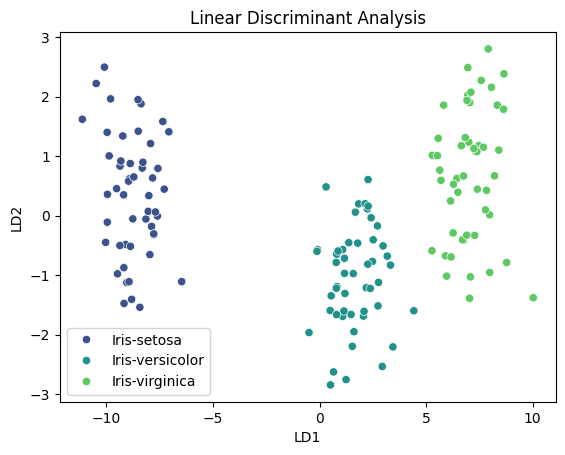

In [14]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
iris_data = pd.read_csv('Iris.csv')

# Separate features and target
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualize the transformed data
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y, palette='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Analysis')
plt.legend(loc='best')
plt.show()


The difference between PCA and LDA is that PCA is better utilized for recognizing the varience in the entire dataset while LDA is more focused on recognizing class seperation through dimentionality reduction.
